## Customer Segmentation using Bank Marketing Dataset (Clustering)

- Author: **Sunil Kumar R M**
- Version: **0.0.1**
- LinkedIn: https://www.linkedin.com/in/sunkumx/
- Github:
- Email: **ping.sunilk@gmail.com**

### 1. Business Understanding

Goal: Segment bank customers into meaningful groups to help with targeted marketing campaigns.

Business Questions:
- What types of customers are more likely to respond to campaigns?
- Can we identify distinct clusters such as “Young Professionals”, “Retirees”, “High Income Clients”, etc.?
- How can clustering improve marketing efficiency?

Success Criteria:
- At least 3–5 clusters that are interpretable.
- Marketing team can use them for personalized offers.

## 2. Data Understanding

Input variables:

   - Bank client data:

   1 - age (numeric)

   2 - job : type of job (categorical: "admin.","unknown","unemployed","management","housemaid","entrepreneur","student",
                                       "blue-collar","self-employed","retired","technician","services") 

   3 - marital : marital status (categorical: "married","divorced","single"; note: "divorced" means divorced or widowed)

   4 - education (categorical: "unknown","secondary","primary","tertiary")

   5 - default: has credit in default? (binary: "yes","no")

   6 - balance: average yearly balance, in euros (numeric) 

   7 - housing: has housing loan? (binary: "yes","no")

   8 - loan: has personal loan? (binary: "yes","no")

   - Related with the last contact of the current campaign:

   9 - contact: contact communication type (categorical: "unknown","telephone","cellular") 

  10 - day: last contact day of the month (numeric)

  11 - month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")

  12 - duration: last contact duration, in seconds (numeric)

   - Other attributes:

  13 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)

  14 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric, -1 means client was not previously contacted)

  15 - previous: number of contacts performed before this campaign and for this client (numeric)

  16 - poutcome: outcome of the previous marketing campaign (categorical: "unknown","other","failure","success")

  - Output variable (desired target):
  
  17 - y - has the client subscribed a term deposit? (binary: "yes","no")

## 3. Exploratory Data Analysis (EDA)

3.1 Importing all the requried libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score, davies_bouldin_score

pd.set_option('display.max_columns', None)
sns.set(style='whitegrid', palette="muted")

In [4]:
# Loading the dataset

df = pd.read_csv("../data/raw/marketing-data.csv")

Basic eyeballing of data

In [5]:
df.head(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,is_success
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [6]:
df.tail(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,is_success
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no
45210,37,entrepreneur,married,secondary,no,2971,no,no,cellular,17,nov,361,2,188,11,other,no


In [7]:
df.shape

(45211, 17)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   age         45211 non-null  int64 
 1   job         45211 non-null  object
 2   marital     45211 non-null  object
 3   education   45211 non-null  object
 4   default     45211 non-null  object
 5   balance     45211 non-null  int64 
 6   housing     45211 non-null  object
 7   loan        45211 non-null  object
 8   contact     45211 non-null  object
 9   day         45211 non-null  int64 
 10  month       45211 non-null  object
 11  duration    45211 non-null  int64 
 12  campaign    45211 non-null  int64 
 13  pdays       45211 non-null  int64 
 14  previous    45211 non-null  int64 
 15  poutcome    45211 non-null  object
 16  is_success  45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [9]:
df.dtypes

age            int64
job           object
marital       object
education     object
default       object
balance        int64
housing       object
loan          object
contact       object
day            int64
month         object
duration       int64
campaign       int64
pdays          int64
previous       int64
poutcome      object
is_success    object
dtype: object

In [10]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'is_success'],
      dtype='object')

In [12]:
#Checking null values
df.isnull().sum()

age           0
job           0
marital       0
education     0
default       0
balance       0
housing       0
loan          0
contact       0
day           0
month         0
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
is_success    0
dtype: int64

No missing values noted.

## 3.2 Univariate Analysis

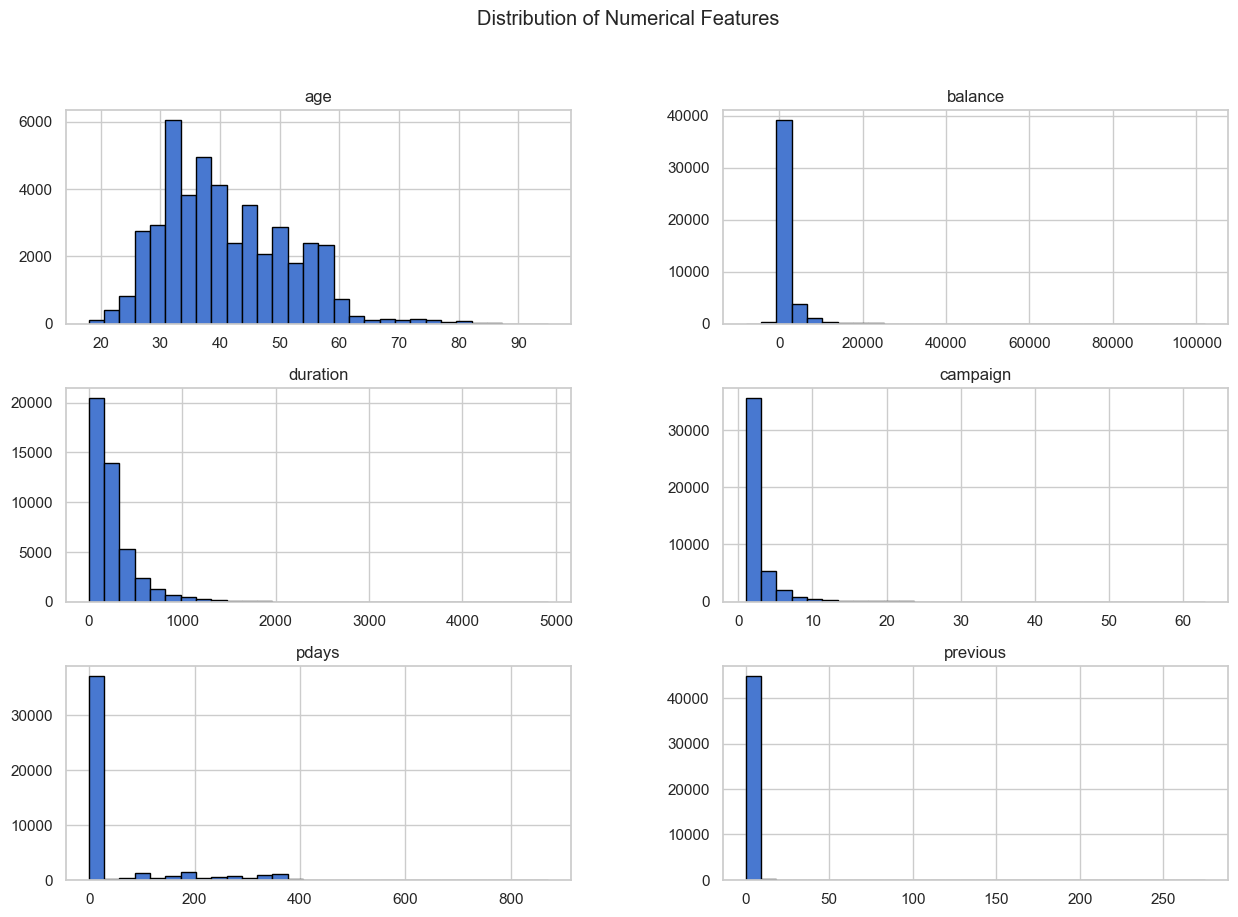

In [13]:
#Numerical features distrubution
num_cols = ['age','balance', 'duration', 'campaign', 'pdays', 'previous' ]

df[num_cols].hist(bins=30, figsize=(15,10), edgecolor='black')
plt.suptitle("Distribution of Numerical Features")
plt.savefig("../visuals/numerical_features_distribution.png")
plt.show()

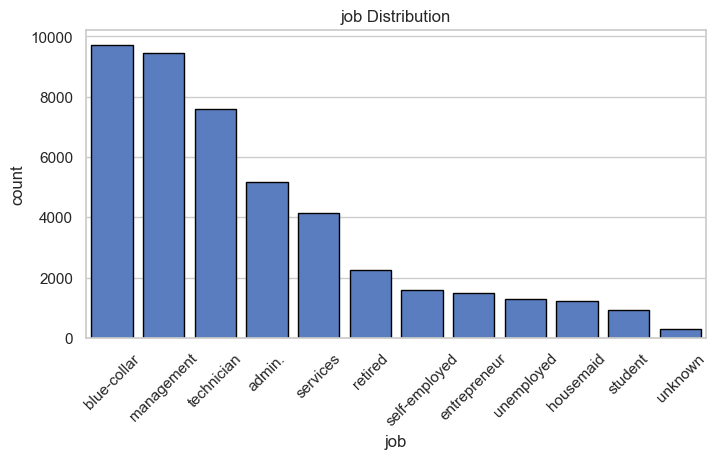

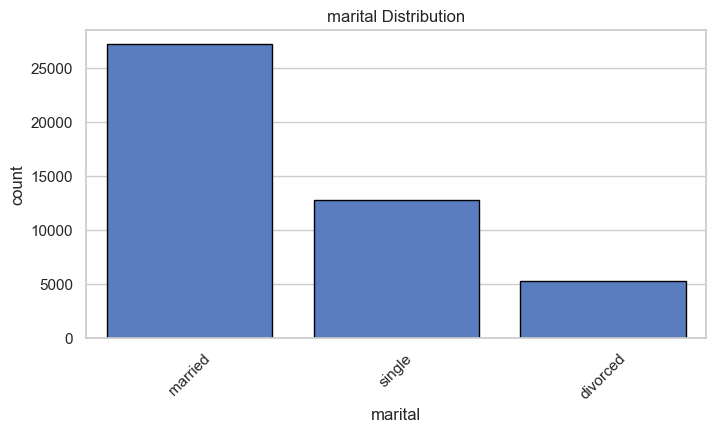

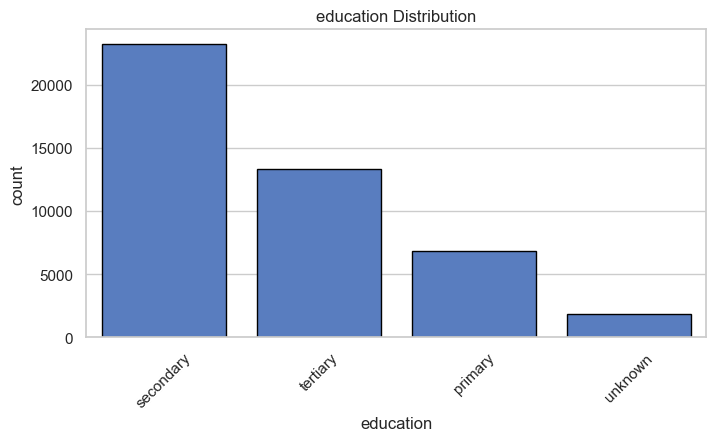

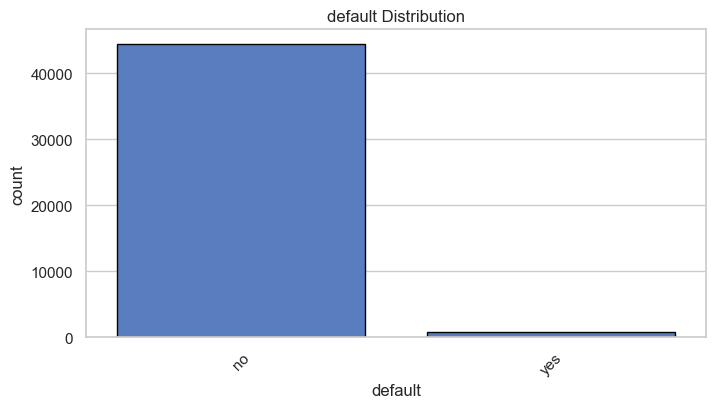

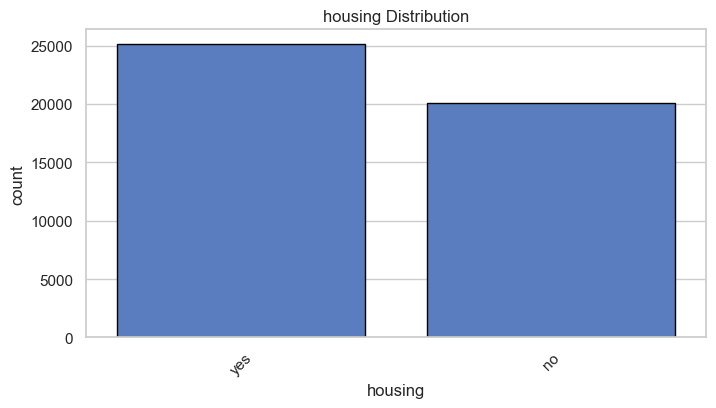

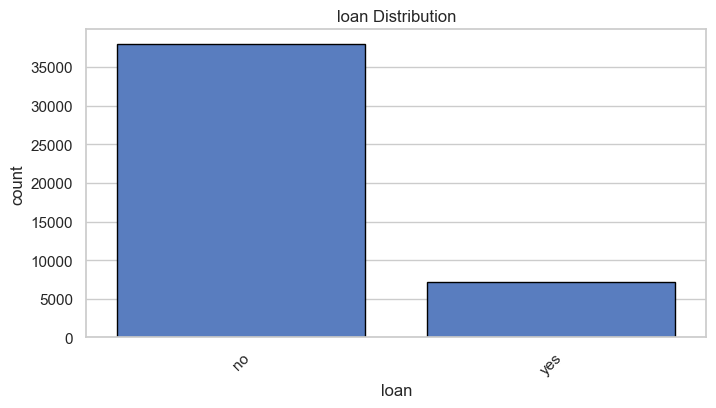

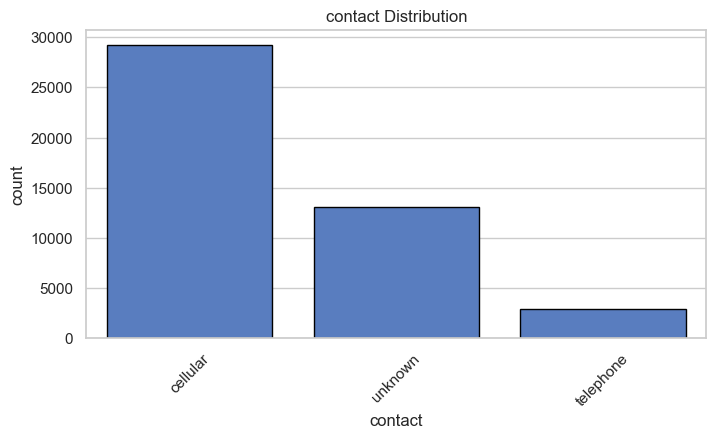

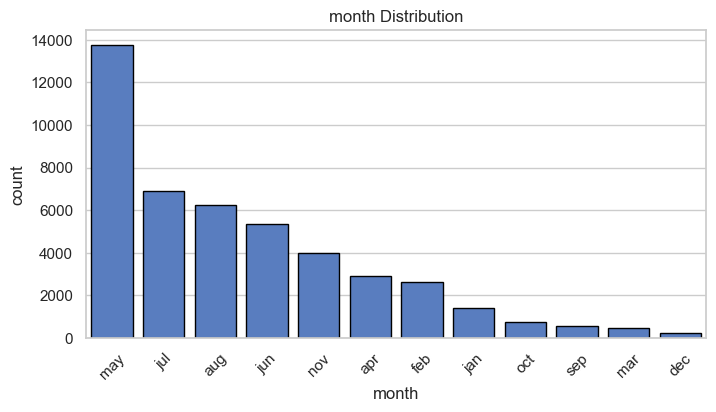

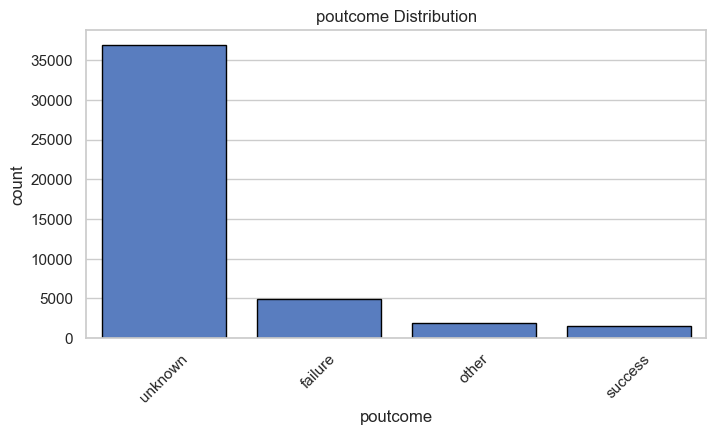

In [15]:
#Categorical Feature Distribution

cat_cols = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']
for col in cat_cols:
    plt.figure(figsize=(8,4))
    sns.countplot(x=col, data=df, order=df[col].value_counts().index, edgecolor='black')
    plt.title(f"{col} Distribution")
    plt.xticks(rotation=45)
    plt.savefig(f"../visuals/{col}_distrubution.png")
    plt.show()